In [4]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv('uber.csv')

In [8]:
df = data.copy()

In [10]:
df.isnull()

Unnamed: 0    key  fare_amount  pickup_datetime  pickup_longitude  \
0            False  False        False            False             False   
1            False  False        False            False             False   
2            False  False        False            False             False   
3            False  False        False            False             False   
4            False  False        False            False             False   
...            ...    ...          ...              ...               ...   
199995       False  False        False            False             False   
199996       False  False        False            False             False   
199997       False  False        False            False             False   
199998       False  False        False            False             False   
199999       False  False        False            False             False   

        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0                 False              False             False            False  
1                 False              False             False            False  
2                 False              False             False            False  
3                 False              False             False            False  
4                 False              False             False            False  
...                 ...                ...               ...              ...  
199995            False              False             False            False  
199996            False              False             False            False  
199997            False              False             False            False  
199998            False              False             False            False  
199999            False              False             False            False  

[200000 rows x 9 columns]

In [12]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [16]:
df.head

<bound method NDFrame.head of         Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC      

In [21]:
#drop(['Unnamed: 0', 'key', 'pickup_datetime'], axis=1): 
#Specifies the columns to remove by name, with axis=1 indicating that these are columns (not rows).



df = df.drop(['Unnamed: 0','key','pickup_datetime'],axis=1) #remember

In [25]:
#inplace=True: This modifies df directly, so the changes are applied to the original DataFrame without needing to assign it back to df.
df.dropna(inplace=True)

In [27]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [35]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


{'whiskers': [<matplotlib.lines.Line2D at 0x1685dbad0>,
 'caps': [<matplotlib.lines.Line2D at 0x168420050>,
 'boxes': [<matplotlib.lines.Line2D at 0x1685db890>],
 'medians': [<matplotlib.lines.Line2D at 0x168420d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x168420e90>],
 'means': []}

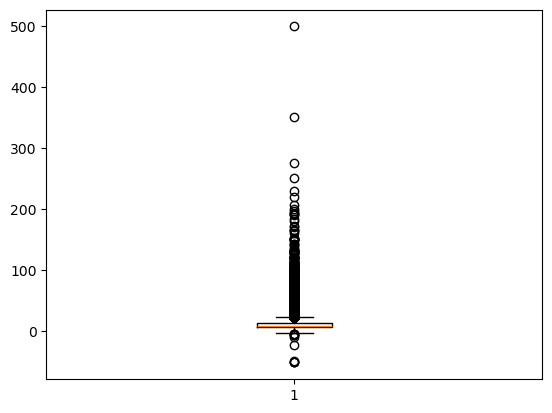

In [36]:
plt.boxplot(df['fare_amount'])

In [43]:
#remove outliers
#df['fare_amount'].quantile(0.05): 
#Computes the 5th percentile (or the value below which 5% of the fare_amount data falls). This value is assigned to the variable low.

#df['fare_amount'].quantile(0.95): 
#Computes the 95th percentile (or the value below which 95% of the fare_amount data falls). This value is assigned to the variable high.
low = df['fare_amount'].quantile(0.05)
high = df['fare_amount'].quantile(0.95)
df = df[(df['fare_amount']>low) &(df['fare_amount']<high) ]

{'whiskers': [<matplotlib.lines.Line2D at 0x1684c71d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1684c77a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1684c6c30>],
 'medians': [<matplotlib.lines.Line2D at 0x1684c7bf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1684c7e30>],
 'means': []}

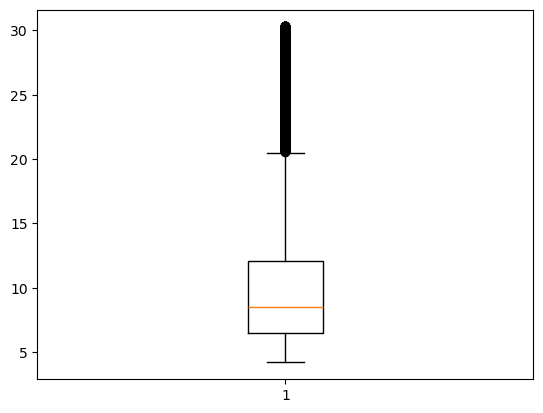

In [45]:
plt.boxplot(df['fare_amount'])

In [47]:
import seaborn as sns

In [49]:
corr = df.corr()

<Axes: >

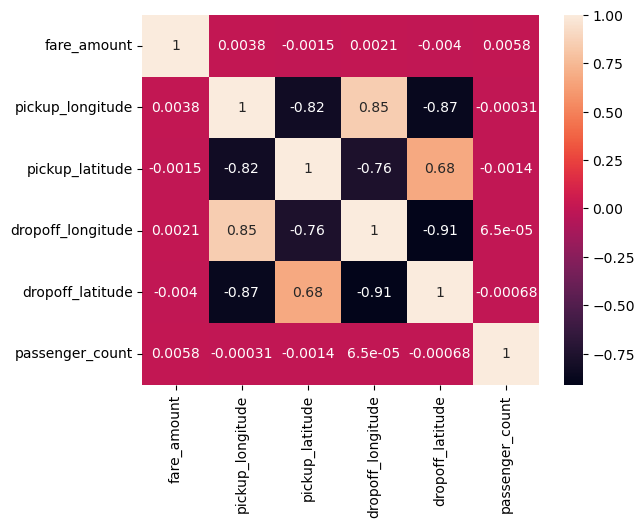

In [51]:
sns.heatmap(corr,annot=True)

In [55]:
from sklearn.model_selection import train_test_split

In [57]:
#train_test_split
x = df.drop(['fare_amount'],axis=1)
y = df['fare_amount']
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [59]:
#lineaar regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [63]:
from sklearn.metrics import mean_squared_error,r2_score 

In [65]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE : ",rmse)
r2 = r2_score(y_test,y_pred)
print("r2 score : ",r2)

RMSE :  5.166208195649952
r2 score :  2.2764336566893917e-06


In [69]:
from sklearn.ensemble import RandomForestRegressor
rmodel = RandomForestRegressor()
rmodel.fit(x_train,y_train)
ry_pred = rmodel.predict(x_test)

In [73]:
from sklearn.metrics import mean_squared_error ,r2_score
rmse = np.sqrt(mean_squared_error(y_test,ry_pred))
print("rmse  : ",rmse)
r2= r2_score(y_test,ry_pred)
print("r2 score : ",r2)

rmse  :  2.6186624716127773
r2 score :  0.7430703342380152


In [75]:
import sklearn
print(dir(sklearn))

['_BUILT_WITH_MESON', '__SKLEARN_SETUP__', '__all__', '__builtins__', '__cached__', '__check_build', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_built_with_meson', '_config', '_distributor_init', '_loss', 'base', 'clone', 'compose', 'config_context', 'decomposition', 'dummy', 'ensemble', 'exceptions', 'externals', 'get_config', 'linear_model', 'logger', 'logging', 'metrics', 'model_selection', 'neighbors', 'os', 'pipeline', 'preprocessing', 'random', 'set_config', 'setup_module', 'show_versions', 'sklearn', 'svm', 'sys', 'tree', 'utils']


In [81]:
print(dir(sklearn.model_selection))


['BaseCrossValidator', 'BaseShuffleSplit', 'FixedThresholdClassifier', 'GridSearchCV', 'GroupKFold', 'GroupShuffleSplit', 'KFold', 'LearningCurveDisplay', 'LeaveOneGroupOut', 'LeaveOneOut', 'LeavePGroupsOut', 'LeavePOut', 'ParameterGrid', 'ParameterSampler', 'PredefinedSplit', 'RandomizedSearchCV', 'RepeatedKFold', 'RepeatedStratifiedKFold', 'ShuffleSplit', 'StratifiedGroupKFold', 'StratifiedKFold', 'StratifiedShuffleSplit', 'TimeSeriesSplit', 'TunedThresholdClassifierCV', 'ValidationCurveDisplay', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__getattr__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_classification_threshold', '_plot', '_search', '_split', '_validation', 'check_cv', 'cross_val_predict', 'cross_val_score', 'cross_validate', 'learning_curve', 'permutation_test_score', 'train_test_split', 'typing', 'validation_curve']


In [83]:
help(sklearn)

Help on package sklearn:

NAME
    sklearn - Configure global settings and get information about the working environment.

PACKAGE CONTENTS
    __check_build (package)
    _build_utils (package)
    _built_with_meson
    _config
    _distributor_init
    _isotonic
    _loss (package)
    _min_dependencies
    base
    calibration
    cluster (package)
    compose (package)
    conftest
    covariance (package)
    cross_decomposition (package)
    datasets (package)
    decomposition (package)
    discriminant_analysis
    dummy
    ensemble (package)
    exceptions
    experimental (package)
    externals (package)
    feature_extraction (package)
    feature_selection (package)
    gaussian_process (package)
    impute (package)
    inspection (package)
    isotonic
    kernel_approximation
    kernel_ridge
    linear_model (package)
    manifold (package)
    metrics (package)
    mixture (package)
    model_selection (package)
    multiclass
    multioutput
    naive_bayes
    neig

In [91]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |
 |  A random forest regressor.
 |
 |  A random forest is a meta estimator that fits a number of decision tree
 |  regressors on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=Tru

In [95]:
help(mean_squared_error)

Help on function mean_squared_error in module sklearn.metrics._regression:

mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared='deprecated')
    Mean squared error regression loss.

    Read more in the :ref:`User Guide <mean_squared_error>`.

    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.

    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.

    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.

    multioutput : {'raw_values', 'uniform_average'} or array-like of shape             (n_outputs,), default='uniform_average'
        Defines aggregating of multiple output values.
        Array-like value defines weights used to average errors.

        'raw_values' :
            Returns a full set of errors in case of multioutput input.

        'uniform_ave